In [4]:
#use Lasso to select features
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# get the all file name under the folder
import os
import time
path = '/Users/jeremyg/Documents/GitHub/SummerIndependentProject/tickData/factors_data/'

In [5]:
# calculate the correlation matrix and heat map
data = pd.read_csv(path + 'JBF_factors.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-11-02':]
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,time_to_end,midQuote,volume,Stock_Ask_Bid_Price_Depth_Ratio,Stock_Ask_Bid_Total_Volume_Ratio,delta_1
spread,1.000000,0.982624,0.944977,0.886128,0.348955,0.337672,0.118751,0.298959,0.988844,0.960583,0.916635,0.089305,-0.728356,-0.163042,0.059242,-0.031618,-0.113728
MA_5,0.982624,1.000000,0.968009,0.905888,0.331602,0.347756,0.047335,0.185222,0.998584,0.981193,0.937233,0.071129,-0.741468,-0.144278,0.054380,-0.032768,-0.059331
MA_20,0.944977,0.968009,1.000000,0.950652,0.131569,0.213810,-0.166061,0.012595,0.970421,0.996914,0.975542,0.027392,-0.761621,-0.102656,0.046768,-0.030410,-0.040302
MA_60,0.886128,0.905888,0.950652,1.000000,-0.081046,-0.057103,-0.079554,-0.093625,0.909025,0.955306,0.993125,0.005272,-0.792150,-0.078602,0.042187,-0.035326,-0.023488
MACD,0.348955,0.331602,0.131569,-0.081046,1.000000,0.929197,0.434075,0.716193,0.324832,0.164019,-0.006740,0.196428,0.002148,-0.192115,0.034634,-0.004071,-0.096850
MACDsignal,0.337672,0.347756,0.213810,-0.057103,0.929197,1.000000,0.070390,0.537230,0.340364,0.221813,0.032451,0.158386,-0.002593,-0.153315,0.025423,0.000226,-0.056874
MACDhist,0.118751,0.047335,-0.166061,-0.079554,0.434075,0.070390,1.000000,0.623505,0.047081,-0.097983,-0.097291,0.144092,0.012119,-0.144814,0.031508,-0.011538,-0.122770
RSI,0.298959,0.185222,0.012595,-0.093625,0.716193,0.537230,0.623505,1.000000,0.198941,0.049310,-0.056922,0.226117,0.047521,-0.212067,0.044941,0.012846,-0.265784
EMA_5,0.988844,0.998584,0.970421,0.909025,0.324832,0.340364,0.047081,0.198941,1.000000,0.983066,0.940079,0.071797,-0.743718,-0.145836,0.055206,-0.032359,-0.069034
EMA_20,0.960583,0.981193,0.996914,0.955306,0.164019,0.221813,-0.097983,0.049310,0.983066,1.000000,0.978694,0.034311,-0.768353,-0.110979,0.049217,-0.032029,-0.043975


In [6]:
data

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,time_to_end,midQuote,volume,Stock_Ask_Bid_Price_Depth_Ratio,Stock_Ask_Bid_Total_Volume_Ratio,delta_1
2022-12-01 09:05:00,1.418396e-02,0.005395,0.003386,0.004048,0.000829,0.000005,0.000824,80.629972,0.006889,0.004104,0.003595,0.981132,11.231870,510.681496,0.990774,0.808505,-2.318945e-03
2022-12-01 09:10:00,1.186501e-02,0.009397,0.004383,0.004332,0.001829,0.000606,0.001223,70.325400,0.010059,0.005669,0.004186,0.962264,11.227049,1072.390625,1.000000,0.705314,1.479782e-03
2022-12-01 09:15:00,1.334479e-02,0.011323,0.004931,0.004494,0.002199,0.000925,0.001274,72.755342,0.011154,0.006400,0.004486,0.943396,11.229285,1300.771208,1.000000,0.373975,1.032624e-03
2022-12-01 09:20:00,1.437742e-02,0.013492,0.005540,0.004685,0.002546,0.001249,0.001297,74.334719,0.012229,0.007159,0.004811,0.924528,11.229995,1495.982418,1.000000,0.873585,3.435766e-04
2022-12-01 09:25:00,1.472099e-02,0.013599,0.006138,0.004878,0.002816,0.001562,0.001254,74.856981,0.013059,0.007880,0.005136,0.905660,11.232469,1671.054176,1.000000,1.900695,-6.802939e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 13:05:00,-9.143132e-04,-0.000579,-0.000300,-0.000650,0.000020,0.000151,-0.000132,48.108388,-0.000769,-0.000505,-0.000606,0.075472,11.589045,4768.773913,1.000000,0.901234,1.278235e-03
2023-03-31 13:10:00,3.639219e-04,-0.000515,-0.000287,-0.000644,0.000088,0.000139,-0.000051,53.994446,-0.000391,-0.000423,-0.000574,0.056604,11.588460,4851.370546,1.000000,0.942400,-3.639219e-04
2023-03-31 13:15:00,-1.776357e-15,-0.000515,-0.000187,-0.000644,0.000112,0.000133,-0.000022,52.179720,-0.000261,-0.000382,-0.000556,0.037736,11.587569,4898.781726,1.000000,0.989568,1.776357e-15
2023-03-31 13:20:00,0.000000e+00,-0.000515,-0.000159,-0.000644,0.000129,0.000132,-0.000004,52.179720,-0.000174,-0.000346,-0.000537,0.018868,11.587569,4923.114537,1.000000,0.970508,-1.711526e-04


In [7]:
# according to the correlation matrix, we can see that the spread is highly correlated with delta_1
list = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']

In [8]:
def valid_date_n_days_later(start, all_data, n):
    i = 1
    while i <= n:
        start = start + pd.DateOffset(days=1)
        if start in all_data.index:
            i = i + 1
        if start > all_data.index[-1]:
            return False
    return start

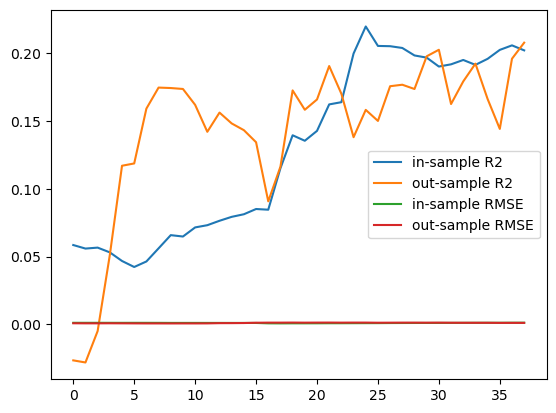

in-sample R2:  0.13046999724884983
out-sample R2:  0.1441402818770368
in-sample RMSE:  0.0011225646550396564
out-sample RMSE:  0.001144607730857743


In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# use sklearn to fit Lasso model
#split the data into train and test
all_r2_in = []
all_r2_out = []
all_rmse_in = []
all_rmse_out = []

start_date = pd.to_datetime('2020-07-02 09:05:00')

while start_date <= data.index[-1]:
    train_date = valid_date_n_days_later(start_date, data, 20)
    if not train_date:
        break
    test_date = valid_date_n_days_later(train_date, data, 1)
    if not test_date:
        break
    end_date = valid_date_n_days_later(test_date, data, 5)
    if not end_date:
        break


    train_data = data.loc[start_date:train_date]
    train_data = train_data[:-1]
    test_data = data.loc[test_date:end_date]
    test_data = test_data[:-1]

    X_train = train_data[list]
    y_train = train_data['delta_1']

    X_test = test_data[list]
    y_test = test_data['delta_1']

    # fit the OLS
    model_ols = LinearRegression()
    model_ols.fit(X_train, y_train)

    r2_in = model_ols.score(X_train, y_train)
    r2_out = model_ols.score(X_test, y_test)
    rmse_in = np.sqrt(np.mean((model_ols.predict(X_train) - y_train) ** 2))
    rmse_out = np.sqrt(np.mean((model_ols.predict(X_test) - y_test) ** 2))

    # add the result to the list
    all_r2_in.append(r2_in)
    all_r2_out.append(r2_out)
    all_rmse_in.append(rmse_in)
    all_rmse_out.append(rmse_out)

    start_date = valid_date_n_days_later(start_date, data, 1)

# plot the 4 lists in the same plot
plt.plot(all_r2_in, label='in-sample R2')
plt.plot(all_r2_out, label='out-sample R2')
plt.plot(all_rmse_in, label='in-sample RMSE')
plt.plot(all_rmse_out, label='out-sample RMSE')
plt.legend()
plt.show()

# print R2
print("in-sample R2: ", sum(all_r2_in)/len(all_r2_in))
print("out-sample R2: ", sum(all_r2_out)/len(all_r2_out))
print("in-sample RMSE: ", sum(all_rmse_in)/len(all_rmse_in))
print("out-sample RMSE: ", sum(all_rmse_out)/len(all_rmse_out))

In [10]:
# use adaBoost to fit the model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

all_r2_in = []
all_r2_out = []
all_rmse_in = []
all_rmse_out = []

start_date = pd.to_datetime('2020-07-02 09:05:00')

while start_date <= data.index[-1]:
    train_date = valid_date_n_days_later(start_date, data, 5)
    if train_date > data.index[-1]:
        break
    test_date = valid_date_n_days_later(train_date, data, 1)
    end_date = valid_date_n_days_later(test_date, data, 1)


    train_data = data.loc[start_date:train_date]
    train_data = train_data[:-1]
    test_data = data.loc[test_date:end_date]
    test_data = test_data[:-1]

    X_train = train_data[list]
    y_train = train_data['delta_1']

    X_test = test_data[list]
    y_test = test_data['delta_1']

    # fit the OLS
    regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)
    regr.fit(X_train, y_train)

    r2_in =  regr.score(X_train, y_train)
    r2_out = regr.score(X_test, y_test)
    rmse_in =  np.sqrt(np.mean((regr.predict(X_train) - y_train) ** 2))
    rmse_out = np.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2))

    # add the result to the list
    all_r2_in.append(r2_in)
    all_r2_out.append(r2_out)
    all_rmse_in.append(rmse_in)
    all_rmse_out.append(rmse_out)

    start_date = end_date

# plot the 4 lists in the same plot
plt.plot(all_r2_in, label='in-sample R2')
plt.plot(all_r2_out, label='out-sample R2')
plt.plot(all_rmse_in, label='in-sample RMSE')
plt.plot(all_rmse_out, label='out-sample RMSE')
plt.legend()
plt.show()

# print R2
print("in-sample R2: ", sum(all_r2_in)/len(all_r2_in))
print("out-sample R2: ", sum(all_r2_out)/len(all_r2_out))
print("in-sample RMSE: ", sum(all_rmse_in)/len(all_rmse_in))
print("out-sample RMSE: ", sum(all_rmse_out)/len(all_rmse_out))

TypeError: '>' not supported between instances of 'bool' and 'Timestamp'

In [ ]:
# use lightGBM to fit the model using sklearn
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

all_r2_in = []
all_r2_out = []
all_rmse_in = []
all_rmse_out = []

start_date = pd.to_datetime('2020-07-02 09:05:00')

while start_date <= data.index[-1]:
    train_date = valid_date_n_days_later(start_date, data, 3)
    if train_date > data.index[-1]:
        break
    test_date = valid_date_n_days_later(train_date, data, 1)
    end_date = valid_date_n_days_later(test_date, data, 1)


    train_data = data.loc[start_date:train_date]
    train_data = train_data[:-1]
    test_data = data.loc[test_date:end_date]
    test_data = test_data[:-1]

    X_train = train_data[list]
    y_train = train_data['delta_1']

    X_test = test_data[list]
    y_test = test_data['delta_1']

    # create dataset for lightgbm
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # specify your configurations as a dict
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'mse', 'mae'},
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
    }

    print('Starting training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=100,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=5)

    print('Saving model...')
    # save model to file
    gbm.save_model('model.txt')

    print('Starting predicting...')
    # predict
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

    r2_in =  regr.score(X_train, y_train)
    r2_out = regr.score(X_test, y_test)
    rmse_in =  np.sqrt(np.mean((regr.predict(X_train) - y_train) ** 2))
    rmse_out = np.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2))

    # add the result to the list
    all_r2_out.append(mean_squared_error(y_test, y_pred) ** 0.5)
    all_rmse_out.append(r2_score(y_test, y_pred))

    start_date = end_date

# plot the 4 lists in the same plot
plt.plot(all_r2_out, label='out-sample R2')
plt.plot(all_rmse_out, label='out-sample RMSE')
plt.legend()
plt.show()

# print R2
print("out-sample R2: ", sum(all_r2_out)/len(all_r2_out))
print("out-sample RMSE: ", sum(all_rmse_out)/len(all_rmse_out))
# use the data above to fit the model

In [ ]:
# use the